In [46]:
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import statsmodels.api as sm
from scipy import stats, polyval
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 30
# plt.rcParams["font.weight"] = 'bold'

%matplotlib inline


In [82]:
s1 = pd.read_csv('nampo.csv',encoding = 'cp949')
s1['time']=pd.date_range(start='2015-1-1-00', end='2019-12-31-23', freq = 'H')
s1=s1.dropna(axis=0) # 결측값 행 제거
# s1['PM2.5 Nampo']= s1['PM2.5 Nampo'].apply(pd.to_numeric, errors = 'coerce')

# s1= s1.astype(float)
# df['Gwang-bok'] = df['Gwang-bok'].apply(pd.to_numeric, errors='coerce')

s1


,year,month,day,hour,PM2.5 Nampo,PM10 Nampo,PM2.5 Gwangbok,PM10 Gwangbok,time
0,2015,1,1,0,15,25,11,19,2015-01-01 00:00:00
1,2015,1,1,1,17,38,9,21,2015-01-01 01:00:00
2,2015,1,1,2,16,20,8,19,2015-01-01 02:00:00
3,2015,1,1,3,10,17,7,22,2015-01-01 03:00:00
4,2015,1,1,4,4,11,10,26,2015-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...
43819,2019,12,31,19,12,19,12,16,2019-12-31 19:00:00
43820,2019,12,31,20,14,24,9,11,2019-12-31 20:00:00
43821,2019,12,31,21,12,13,10,7,2019-12-31 21:00:00
43822,2019,12,31,22,12,16,14,4,2019-12-31 22:00:00


In [83]:
def auto(df):
    df["Year"] = df["time"].dt.year
    df["time-month"] = df["time"].dt.month
    df["time-day"] = df["time"].dt.day
    df["time-hour"] = df["time"].dt.hour
    
    df['PM2.5 Nampo'] = df['PM2.5 Nampo'].apply(pd.to_numeric, errors='coerce')
    df['PM10 Nampo'] = df['PM10 Nampo'].apply(pd.to_numeric, errors='coerce')
    df['PM2.5 Gwangbok'] = df['PM2.5 Gwangbok'].apply(pd.to_numeric, errors='coerce')
    df['PM10 Gwangbok'] = df['PM10 Gwangbok'].apply(pd.to_numeric, errors='coerce')

    df = df[['PM2.5 Nampo','PM10 Nampo','PM2.5 Gwangbok','PM10 Gwangbok','year']]
    df.set_index('year', inplace = True)
    
    return df

s1 = auto(s1)
s1

,PM2.5 Nampo,PM10 Nampo,PM2.5 Gwangbok,PM10 Gwangbok
year,,,,
2015,15.0,25.0,11.0,19.0
2015,17.0,38.0,9.0,21.0
2015,16.0,20.0,8.0,19.0
2015,10.0,17.0,7.0,22.0
2015,4.0,11.0,10.0,26.0
...,...,...,...,...
2019,12.0,19.0,12.0,16.0
2019,14.0,24.0,9.0,11.0
2019,12.0,13.0,10.0,7.0


0.79
-0.0089111919188809


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            PM2.5 Nampo   R-squared (uncentered):                   0.697
Model:                            OLS   Adj. R-squared (uncentered):              0.697
Method:                 Least Squares   F-statistic:                          9.060e+04
Date:                Mon, 13 Jul 2020   Prob (F-statistic):                        0.00
Time:                        20:14:08   Log-Likelihood:                     -1.6730e+05
No. Observations:               39316   AIC:                                  3.346e+05
Df Residuals:                   39315   BIC:                                  3.346e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
PM2.5 Gwangbok     0.8881      0.003    300.996      0.000       0.882       0.894
==============================================================================
Omnibus:                    96765.405   Durbin-Watson:                   1.231
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       2847210904.975
Skew:                          26.042   Prob(JB):                         0.00
Kurtosis:                    1320.321   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

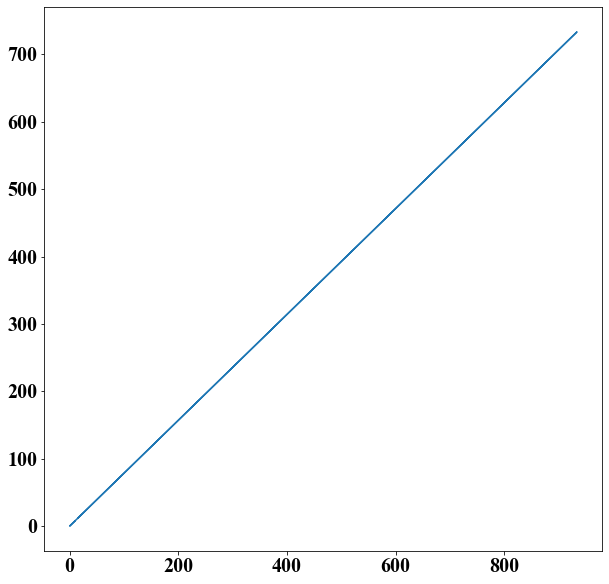

In [97]:
s1=s1.dropna(axis=0) # 결측값 행 제거
X=pd.DataFrame(s1['PM2.5 Nampo'])
y = s1['PM2.5 Gwangbok']

model = linear_model.LinearRegression(fit_intercept=False)
model.fit(X=pd.DataFrame(s1['PM2.5 Nampo']), y= s1['PM2.5 Gwangbok'])
prediction = model.predict(X=pd.DataFrame(s1['PM2.5 Nampo']))
ax = plt.plot(X,model.predict(X))

fit = model.fit(X=pd.DataFrame(s1['PM2.5 Nampo']), y= s1['PM2.5 Gwangbok'])
print(round(fit.coef_[0],2))
print(fit.score(X,y))
lm = sm.OLS(s1['PM2.5 Nampo'], s1[['PM2.5 Gwangbok']])
results = lm.fit()
results.summary()


[0.94865374]
[0.80462434]


(0, 300)

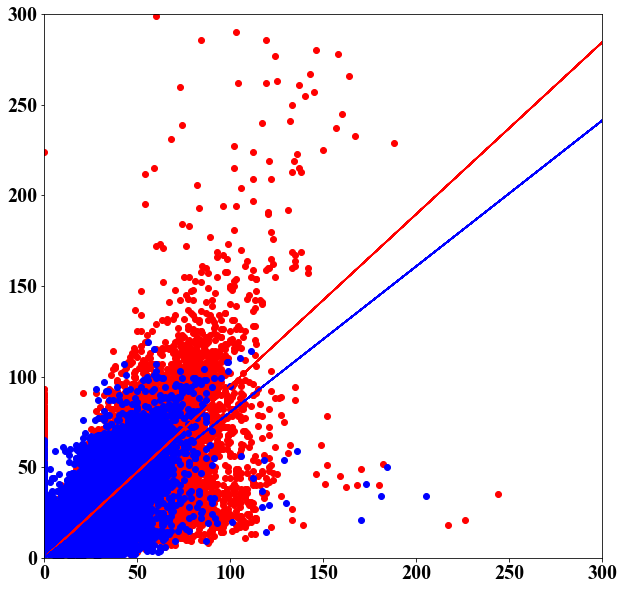

In [127]:
# 전처리
s1 = s1.drop(s1[s1['PM10 Gwangbok']> 300].index)
s1 = s1.drop(s1[s1['PM10 Nampo']> 300].index)
s1=s1.dropna(axis=0) # 결측값 행 제거

y=s1['PM10 Gwangbok'] #
x=s1['PM10 Nampo']


# 선형회귀식
model = linear_model.LinearRegression(fit_intercept=False)
model = model.fit(X=pd.DataFrame(x), y= y)

ax1 = plt.scatter(x, y, color="red")
ax1 = plt.plot(X,model.predict(X), color = 'red')
print(model.coef_)

y2=s1['PM2.5 Gwangbok']
x2=s1['PM2.5 Nampo']

model2 = linear_model.LinearRegression(fit_intercept=False)
model2 = model2.fit(X=pd.DataFrame(x2), y= y2)
print(model2.coef_)
ax1 = plt.plot(X,model2.predict(X), color = 'blue')
ax1 = plt.scatter(x2, y2, color="blue")


# linear_regression2 = linear_model.LinearRegression(fit_intercept=False)
# linear_regression2.fit(X=pd.DataFrame(x2), y= y2)
# prediction2 = linear_regression.predict(X=pd.DataFrame(x2))

# # print(prediction, prediction2)

# plt.rcParams["font.size"] = 20
# plt.rcParams["figure.figsize"] = (10,10)

# ax2 = plt.scatter(x2, y2, color="blue")

# ax2 = plt.plot(x2, prediction2,'b')
# ax1 = plt.plot(x, prediction,'r')

plt.ylim(0,300)
plt.xlim(0,300)

# plt.show()


In [120]:
y2=s1['PM2.5 Gwangbok']
x2=s1['PM2.5 Nampo']

model2 = linear_model.LinearRegression(fit_intercept=False)
fit = model2.fit(X=pd.DataFrame(x2), y= y2)
# prediction = model2.predict(X=pd.DataFrame(x2))
print(fit.coef_)
ax1 = plt.plot(X,model.predict(X), color = 'blue')
ax1 = plt.scatter(x2, y2, color="blue")
plt.ylim(0,300)
plt.xlim(0,300)


TypeError: fit() got an unexpected keyword argument 'X2'